<a href="https://colab.research.google.com/github/emilia-uncc/IntroML/blob/main/assignment5/Assignment5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

#arrays into tensors
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

#splitting training and validation set
n_samples = t_u.shape[0]
n_val = int(0.2*n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

print(train_indices, val_indices)


train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1*train_t_u
val_t_un= 0.1 * val_t_u


tensor([ 3,  1,  7,  0,  9,  6, 10,  8,  4]) tensor([2, 5])


In [53]:
#------------------functions general-----------------------------------------

#loss calculation, t_p: predicted, t_c: ground truth
def loss_fn(t_p, t_c):
  squared_diffs = (t_p-t_c)**2
  return squared_diffs.mean()#return one value which is the mean value of the differenc tensor


#------------------functions non-linear model-------------------------------------
def model(t_u, w1, w2, b):
  return w2 * t_u ** 2 + w1 * t_u + b

#SGD and Adam non linear
def training_loop_non_linear(n_epochs, optimizer, params, train_t_u, train_t_c, val_t_u, val_t_c):
  losses_non = []
  for epoch in range(1, n_epochs +1):
    train_t_p = model(train_t_u, *params) #calc output
    train_loss = loss_fn(train_t_p, train_t_c) #calc loss

    with torch.no_grad():
      val_t_p = model(val_t_u, *params)
      val_loss = loss_fn(val_t_p, val_t_c)
      assert val_loss.requires_grad == False


    optimizer.zero_grad() # zero the gradients
    train_loss.backward() #calc gradients of the params
    optimizer.step() #calc the gradients

    if epoch % 500 == 0:
      print(f"Epoch: {epoch}, Train_Loss: {float(train_loss)}, Val_Loss: {float(val_loss)}")

    losses_non.append(train_loss.item())

  return params, losses_non



In [57]:
#training with SGD optimizer, non linear model
learning_rates = [0.0001, 0.0003, 0.0005, 0.0008] #higher learning rates give overflow

for learning_rate in learning_rates:

  params_non_SGD = torch.tensor([1.0,1.0,0.0], requires_grad = True)
  optimizer = optim.SGD([params_non_SGD], lr = learning_rate)

  params_non_SGD, losses_sgd = training_loop_non_linear(n_epochs = 5000, optimizer = optimizer, params = params_non_SGD, train_t_u = train_t_un, train_t_c = train_t_c,val_t_u = val_t_un, val_t_c = val_t_c )
  print(params_non_SGD)

Epoch: 500, Train_Loss: 12.007710456848145, Val_Loss: 2.8404903411865234
Epoch: 1000, Train_Loss: 9.368119239807129, Val_Loss: 2.3929171562194824
Epoch: 1500, Train_Loss: 7.550633907318115, Val_Loss: 2.2339000701904297
Epoch: 2000, Train_Loss: 6.298811912536621, Val_Loss: 2.2476892471313477
Epoch: 2500, Train_Loss: 5.436212539672852, Val_Loss: 2.3590502738952637
Epoch: 3000, Train_Loss: 4.841432571411133, Val_Loss: 2.5198705196380615
Epoch: 3500, Train_Loss: 4.430927753448486, Val_Loss: 2.700061559677124
Epoch: 4000, Train_Loss: 4.147226810455322, Val_Loss: 2.8814544677734375
Epoch: 4500, Train_Loss: 3.9507741928100586, Val_Loss: 3.053581953048706
Epoch: 5000, Train_Loss: 3.814361572265625, Val_Loss: 3.2110302448272705
tensor([-1.0445,  0.5763, -0.9586], requires_grad=True)
Epoch: 500, Train_Loss: 7.554956912994385, Val_Loss: 2.2340667247772217
Epoch: 1000, Train_Loss: 4.842304229736328, Val_Loss: 2.5195722579956055
Epoch: 1500, Train_Loss: 3.950892210006714, Val_Loss: 3.05349683761596

In [61]:
#training with Adam optimizer, non linear model
learning_rates = [0.01, 0.001,0.003, 0.008]
for learning_rate in learning_rates:
  params_non_adam = torch.tensor([1.0,1.0,0.0], requires_grad = True)
  optimizer = optim.Adam([params_non_adam], lr = learning_rate)

  params_non_adam, losses_adam = training_loop_non_linear(n_epochs = 5000, optimizer = optimizer, params = params_non_adam, train_t_u = train_t_u, train_t_c = train_t_c, val_t_u = val_t_u, val_t_c = val_t_c)
  print(params_non_adam)

Epoch: 500, Train_Loss: 6.982397079467773, Val_Loss: 2.1747772693634033
Epoch: 1000, Train_Loss: 6.80633544921875, Val_Loss: 2.171820878982544
Epoch: 1500, Train_Loss: 6.559082508087158, Val_Loss: 2.172175884246826
Epoch: 2000, Train_Loss: 6.246808052062988, Val_Loss: 2.181090831756592
Epoch: 2500, Train_Loss: 5.877593517303467, Val_Loss: 2.2059214115142822
Epoch: 3000, Train_Loss: 5.465092658996582, Val_Loss: 2.2562999725341797
Epoch: 3500, Train_Loss: 5.03057861328125, Val_Loss: 2.343471050262451
Epoch: 4000, Train_Loss: 4.602889537811279, Val_Loss: 2.47823429107666
Epoch: 4500, Train_Loss: 4.215155601501465, Val_Loss: 2.666996955871582
Epoch: 5000, Train_Loss: 3.897714853286743, Val_Loss: 2.9065210819244385
tensor([-0.0806,  0.0055, -1.2609], requires_grad=True)
Epoch: 500, Train_Loss: 3867956.5, Val_Loss: 2768956.5
Epoch: 1000, Train_Loss: 810710.0625, Val_Loss: 579861.25
Epoch: 1500, Train_Loss: 94939.671875, Val_Loss: 67695.2265625
Epoch: 2000, Train_Loss: 5054.34423828125, Val_L

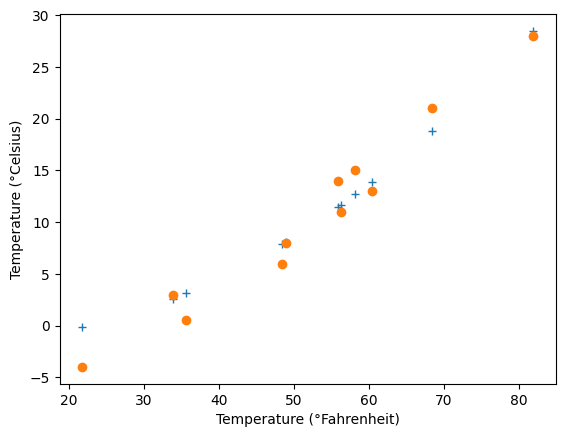

In [62]:
#predicted final values with learning rate 0.1 and Adam optimizer
t_p = model(t_u, *params_non_adam)
#plot
fig = plt.figure()
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy(), '+')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [63]:

#------------------functions linear model-------------------------------------
#linear model
def model_lin(t_u, w, b):
  return w*t_u +b

#SGD and Adam  linear
def training_loop_linear(n_epochs, optimizer, params, train_t_u, train_t_c, val_t_u, val_t_c):
  losses = []
  for epoch in range(1, n_epochs +1):
    train_t_p = model_lin(train_t_u, *params) #calc output
    train_loss = loss_fn(train_t_p, train_t_c) #calc loss

    with torch.no_grad():
      val_t_p = model_lin(val_t_u, *params)
      val_loss = loss_fn(val_t_p, val_t_c)
      assert val_loss.requires_grad == False


    optimizer.zero_grad() # zero the gradients
    train_loss.backward() #calc gradients of the params
    optimizer.step() #calc the gradients

    if epoch % 500 == 0:
      print(f"Epoch: {epoch}, Train_Loss: {float(train_loss)}, Val_Loss: {float(val_loss)}")

    losses.append(train_loss.item())

  return params, losses

In [67]:
#training with Adam optimizer, linear model
learning_rates = [0.1,0.05, 0.08, 0.01]
for learning_rate in learning_rates:
  params_adam = torch.tensor([1.0,0.0], requires_grad = True)
  optimizer = optim.Adam([params_adam], lr = learning_rate)

  params_adam, losses_adam = training_loop_linear(n_epochs = 5000, optimizer = optimizer, params = params_adam, train_t_u = train_t_u, train_t_c = train_t_c, val_t_u = val_t_u, val_t_c = val_t_c)
  print(params_adam)

Epoch: 500, Train_Loss: 7.332756996154785, Val_Loss: 2.41652512550354
Epoch: 1000, Train_Loss: 3.4186689853668213, Val_Loss: 1.1800899505615234
Epoch: 1500, Train_Loss: 3.3496921062469482, Val_Loss: 1.0528676509857178
Epoch: 2000, Train_Loss: 3.34954833984375, Val_Loss: 1.0472116470336914
Epoch: 2500, Train_Loss: 3.3495495319366455, Val_Loss: 1.0471562147140503
Epoch: 3000, Train_Loss: 3.34954833984375, Val_Loss: 1.047152042388916
Epoch: 3500, Train_Loss: 3.349547863006592, Val_Loss: 1.0471481084823608
Epoch: 4000, Train_Loss: 3.349547863006592, Val_Loss: 1.0471465587615967
Epoch: 4500, Train_Loss: 3.3495492935180664, Val_Loss: 1.0471465587615967
Epoch: 5000, Train_Loss: 3.34954833984375, Val_Loss: 1.047144889831543
tensor([  0.5333, -17.1409], requires_grad=True)
Epoch: 500, Train_Loss: 16.21048355102539, Val_Loss: 4.10201358795166
Epoch: 1000, Train_Loss: 5.992650032043457, Val_Loss: 2.100090980529785
Epoch: 1500, Train_Loss: 3.601935386657715, Val_Loss: 1.3136966228485107
Epoch: 200

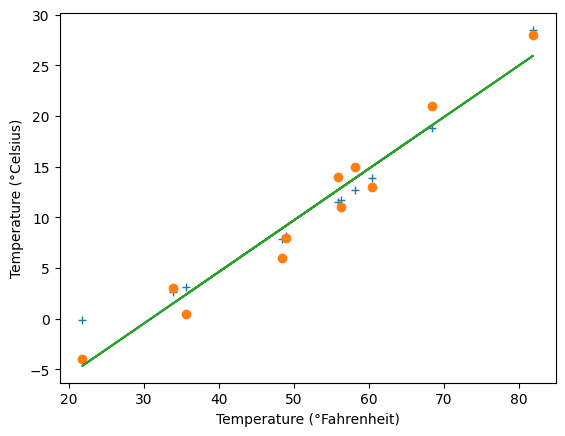

In [71]:
#predicted final values with learning rate 0.1 and Adam optimizer
t_p_non = model(t_u, *params_non_adam)
t_p_lin = model_lin(t_u, *params_adam)
#plot
fig = plt.figure()
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p_non.detach().numpy(), '+')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_u.numpy(), t_p_lin.detach().numpy(), '-')
